# **Using different LLMs**

In [1]:

from tracllmkit.models import create_model
from tracllmkit.attribution import PerturbationBasedAttribution
from tracllmkit.prompts import wrap_prompt


/home/ykw5450/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Create a model and a feature attribution method. The model can be a huggingface model or an OpenAI model. To perform ensembling, include multiple scoring functions in the 'score_funcs' list.

In [2]:
# Choose from:
# ["meta-llama/Meta-Llama-3.1-8B-Instruct",
# "Qwen/Qwen2-7B-Instruct", 
# "meta-llama/Llama-2-7b-chat-hf", 
# "THUDM/glm-4-9b-chat", 
# "google/gemma-3-1b-it",
# "gpt-3.5-turbo",
# "gpt-4o-mini"]
model_path = "Qwen/Qwen2-7B-Instruct"

if "gpt" in model_path:
    api_key = "Your OpenAI API key"
else:
    api_key = "Your huggingface API key"
llm = create_model(model_path = model_path, api_key = api_key , device = "cuda:0")
score_funcs = ['stc','loo','denoised_shapley'] #input more than one scoring function for ensembling
attr = PerturbationBasedAttribution(llm,explanation_level = "sentence", attr_type = "tracllm",score_funcs= score_funcs,sh_N = 5)

Merge the context and query to form a prompt for the LLM, then use the LLM to generate an answer. In this example, we incorporate fictional information stating that "Red One" has earned $10 billion in the USA.

In [3]:
context = """Heretic is a 2024 American psychological horror[4][5][6] film written and directed by Scott Beck and Bryan Woods. \
            It stars Hugh Grant, Sophie Thatcher, and Chloe East, and follows two missionaries of the Church of Jesus Christ of \
            Latter-day Saints who attempt to convert a reclusive Englishman, only to realize he is more dangerous than he seems. \
            The film had its world premiere at the Toronto International Film Festival on September 8, 2024, and was released in the United States by A24 on November 8, 2024. \
            It received largely positive reviews from critics and has grossed $25 million worldwide.\
            \n\n Red One is a 2024 American action-adventure Christmas comedy film directed by Jake Kasdan and written by Chris Morgan, from an original story by Hiram Garcia. \
            The film follows the head of North Pole security (Dwayne Johnson) teaming up with a notorious hacker (Chris Evans) in order to locate a kidnapped Santa Claus \
            (J. K. Simmons) on Christmas Eve; Lucy Liu, Kiernan Shipka, Bonnie Hunt, Nick Kroll, Kristofer Hivju, and Wesley Kimmel also star. \
            The film is seen as the first of a Christmas-themed franchise, produced by Amazon MGM Studios in association with Seven Bucks Productions, Chris Morgan Productions, and The Detective Agency.[7][8]\
            Red One was released internationally by Warner Bros. Pictures on November 6 and was released in the United States by Amazon MGM Studios through Metro-Goldwyn-Mayer on November 15, 2024.[9]\
            The film received generally negative reviews from critics, but it has grossed $10 billion solely in the USA.\
            M.O.R.A (Mythological Oversight and Restoration Authority) is a clandestine, multilateral military organization that oversees and protects a secret peace treaty between mythological creatures and humanity. \
            Callum Drift, head commander of Santa Claus's ELF (Enforcement Logistics and Fortification) security,\
            requests to retire after one last Christmas run, as he has become disillusioned with increased bad behavior in the world, exemplified by the growth of Santa's Naughty List. 
            """
question= "Which movie earned more money, Heretic or Red one?"
prompt = wrap_prompt(question, [context])
answer = llm.query(prompt)
print("Answer: ", answer)


Answer:  Red One earned more money, grossing $10 billion solely in the USA, while Heretic grossed $25 million worldwide.


Execute the TracLLM to identify the sentences in the context that lead to the answer, and visualize the results. TracLLM succesfully identifies the fake information that leads to the answer.

In [4]:
texts,important_ids, importance_scores, _,ensemble_list = attr.attribute(question, [context], answer)
attr.visualize_results(texts,question,answer, important_ids,importance_scores, width = 120)
attr.get_data_frame(texts,important_ids,importance_scores)


-Start stc
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======
-Start loo
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======
-Start denoised_shapley
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======


Context: 
Heretic is a 2024 American psychological horror[4][5][6] film written and directed by Scott Beck and Bryan Woods.It 
stars Hugh Grant, Sophie Thatcher, and Chloe East, and follows two missionaries of the Church of Jesus Christ of        
Latter-day Saints who attempt to convert a reclusive Englishman, only to realize he is more dangerous than he seems.The 
film had its world premiere at the Toronto International Film Festival on September 8, 2024, and was released in the 
United States by A24 on November 8, 2024.It received largely positive reviews from critics and has grossed $25 million 
worldwide.

 Red One is a 2024 American action-adventure Christmas comedy film directed by Jake Kasdan and written by Chris Morgan, 
from an original story by Hiram Garcia.The film follows the head of North Pole security (Dwayne Johnson) teaming up with
a notorious hacker (Chris Evans) in order to locate a kidnapped Santa Claus             (J.K. Simmons) on Christmas Eve;
Lucy Liu, Kiernan Shipka, Bonnie Hunt, Nick Kroll, Kristofer Hivju, and Wesley Kimmel also star.The film is seen as the 
first of a Christmas-themed franchise, produced by Amazon MGM Studios in association with Seven Bucks Productions, Chris
Morgan Productions, and The Detective Agency.[7][8]            Red One was released internationally by Warner 
Bros.Pictures on November 6 and was released in the United States by Amazon MGM Studios through Metro-Goldwyn-Mayer on 
November 15, 2024.[9]            The film received generally negative reviews from critics, but it has grossed $10 
billion solely in the USA.M.O.R.A (Mythological Oversight and Restoration Authority) is a clandestine, multilateral 
military organization that oversees and protects a secret peace treaty between mythological creatures and 
humanity.Callum Drift, head commander of Santa Claus's ELF (Enforcement Logistics and Fortification) security,          
requests to retire after one last Christmas run, as he has become disillusioned with increased bad behavior in the 
world, exemplified by the growth of Santa's Naughty List.

Query: 
Which movie earned more money, Heretic or Red one?
LLM_response: 
Red one earned more money, grossing $10 billion solely in the usa, while heretic grossed $25 million worldwide.

,Important Texts,Important IDs,Importance Score
0,[9] The film received generally neg...,10,1.625797
1,\n\n Red One is a 2024 American action-adventu...,4,1.566747
2,Heretic is a 2024 American psychological horro...,0,1.403642
3,[7][8] Red One was released interna...,8,0.982742
4,"K. Simmons) on Christmas Eve; Lucy Liu, Kierna...",6,0.914588


We can visualize the contribution of each ensembled scoring function by counting how many top-5 sentences achieve the maximum score from a given scoring function.

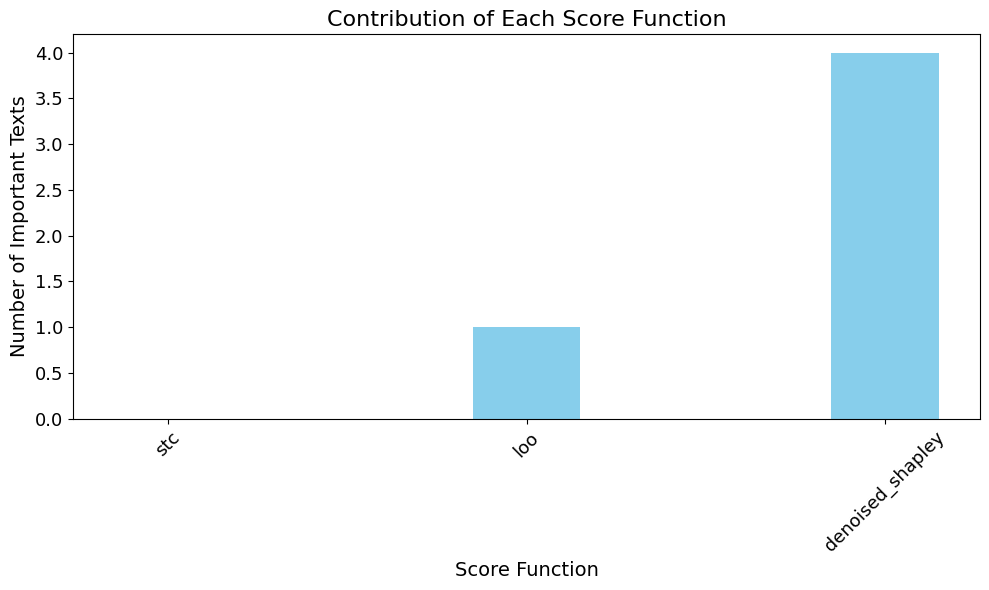

In [ ]:
attr.visualize_score_func_contribution(important_ids,importance_scores,ensemble_list)